### Import Libraries

In [2]:
pip install --upgrade --force-reinstall pillow

     ---------------------------------------- 3.3/3.3 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.1.1
    Uninstalling Pillow-9.1.1:
      Successfully uninstalled Pillow-9.1.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow


     -------------------------------------- 444.0/444.0 MB 2.2 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached grpcio-1.47.0-cp39-cp39-win_amd64.whl (3.6 MB)
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 438.7/438.7 kB 1.4 MB/s eta 0:00:00
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached h5py-3.7.0-cp39-cp39-win_amd64.whl (2.6 MB)
     ---------------------------------------- 5.8/5.8 MB 987.7 kB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.6/1.6 MB 1.0 MB/s eta 0:00:00
  Using cached google_auth-2.9.0-py2.py3-none-any.whl (167 kB)
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached google_auth_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline
import seaborn as sns
import tensorflow as tf 
import math
import os
from pathlib import Path

### Import dataset

In [6]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parents[1]))
from Helper_Functions import common_utils
directory_to_extract_to = os.getcwd()

common_utils.load_data_from_one_drive(directory_to_extract_to, "regression_paths", "real_estate_price_dataset_path")

Done!


### Read data

In [11]:
data = pd.read_csv("output.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2112.917,32.0,84.87882,11,24.98298,121.54124,37.9
1,2,2112.917,19.5,316.59470,9,24.98134,121.53951,42.2
2,3,2113.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2113.511,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2112.833,5.0,391.56840,5,24.97937,121.54245,43.1


In [ ]:
data = data.drop('No', axis =1)

In [ ]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2112.917,32.0,84.87882,11,24.98298,121.54124,37.9
1,2112.917,19.5,316.59470,9,24.98134,121.53951,42.2
2,2113.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2113.511,13.3,561.98450,5,24.98746,121.54391,54.8
4,2112.833,5.0,391.56840,5,24.97937,121.54245,43.1


In [ ]:
data.dtypes

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

### Data Preprocessing

In [ ]:
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data))
data_scaled.columns = data.columns
data_scaled

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-0.902184,1.247134,-0.791400,2.411198,0.850883,0.500354,-0.014072
1,-0.902184,0.146909,-0.609036,1.693559,0.746372,0.381548,0.302226
2,1.482342,-0.398802,-0.415911,0.258281,1.136378,0.683714,0.677369
3,1.224555,-0.398802,-0.415911,0.258281,1.136378,0.683714,1.229051
4,-1.202935,-1.129351,-0.550031,0.258281,0.620830,0.583450,0.368427
...,...,...,...,...,...,...,...
409,-0.207592,-0.363595,2.433186,-1.176997,-1.789307,-1.383377,-1.669117
410,-1.797276,-1.076541,-0.786223,1.693559,0.299649,0.628088,0.949532
411,0.293659,0.085297,-0.549715,0.975920,0.611909,0.405584,0.258091
412,-0.207592,-0.856496,-0.767843,0.258281,-0.184036,0.529884,1.059868


In [ ]:
corrmat= data_scaled.corr()
corrmat['Y house price of unit area'].abs().sort_values(ascending=False)

Y house price of unit area                1.000000
X3 distance to the nearest MRT station    0.674430
X4 number of convenience stores           0.560424
X6 longitude                              0.504899
X5 latitude                               0.429899
X2 house age                              0.206098
X1 transaction date                       0.081668
Name: Y house price of unit area, dtype: float64

In [ ]:
data_scaled

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-0.902184,1.247134,-0.791400,2.411198,0.850883,0.500354,-0.014072
1,-0.902184,0.146909,-0.609036,1.693559,0.746372,0.381548,0.302226
2,1.482342,-0.398802,-0.415911,0.258281,1.136378,0.683714,0.677369
3,1.224555,-0.398802,-0.415911,0.258281,1.136378,0.683714,1.229051
4,-1.202935,-1.129351,-0.550031,0.258281,0.620830,0.583450,0.368427
...,...,...,...,...,...,...,...
409,-0.207592,-0.363595,2.433186,-1.176997,-1.789307,-1.383377,-1.669117
410,-1.797276,-1.076541,-0.786223,1.693559,0.299649,0.628088,0.949532
411,0.293659,0.085297,-0.549715,0.975920,0.611909,0.405584,0.258091
412,-0.207592,-0.856496,-0.767843,0.258281,-0.184036,0.529884,1.059868


### Data Split

In [ ]:
# fit_transform
X_scaled = data_scaled[corrmat['Y house price of unit area'].abs().sort_values(ascending=False).index[1:6]]

In [ ]:
Y_scaled = data_scaled['Y house price of unit area']

In [ ]:
X = X_scaled.values
Y = Y_scaled.values

train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 ) 

## **Linear Regression** / **Multiple Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

l_regressor = LinearRegression()
l_regressor.fit(train_features, train_labels)
l_predicted_price = l_regressor.predict(test_features)

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error( test_labels, l_predicted_price))
print("Mean Squared Error:", metrics.mean_squared_error(test_labels,l_predicted_price))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(test_labels, l_predicted_price)))

Mean Absolute Error: 0.4984761751368309
Mean Squared Error: 0.3865045995571167
Root Mean Squared Error: 0.6216949409132397


# **Polynomial regression**

In [ ]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(train_features,train_labels)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [ ]:
poly_pred=pipe.predict(test_features)

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error( test_labels, poly_pred)) 
print("Mean Squared Error:", metrics.mean_squared_error(test_labels,poly_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(test_labels, poly_pred)))

Mean Absolute Error: 0.47975271237024836
Mean Squared Error: 1.1092860248330336
Root Mean Squared Error: 1.0532264831616387


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=200, random_state=0)

In [ ]:
predicted_price = regressor.predict(test_features)

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error( test_labels, predicted_price)) 
print("Mean Squared Error:", metrics.mean_squared_error(test_labels,predicted_price))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(test_labels, predicted_price)))

Mean Absolute Error: 0.33486720377556667
Mean Squared Error: 0.18949670249222206
Root Mean Squared Error: 0.4353121896894481


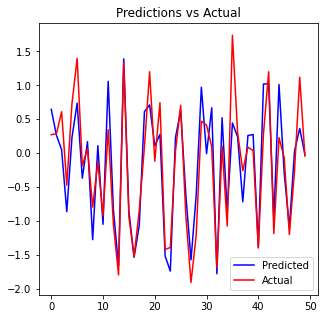

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(predicted_price[:50], label='Predicted', color="blue")  # Plot some data on the (implicit) axes.
plt.plot(test_labels[:50], label='Actual', color="red")  # etc.
plt.title("Predictions vs Actual")
plt.legend()